## Observations and Insights 

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results,how='outer', on='Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice.
print("Unique mouse ID count in combined data: " + str(combined_data_df["Mouse ID"].nunique()))

Unique mouse ID count in combined data: 249


In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Get all the data for the duplicate mouse ID. duplicate Mouse ID and Timepoint
# duplicate mouse data
duplicate_df = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"]) == True]

# list of unique mouse ids
list_duplicate_mouseid = duplicate_df["Mouse ID"].unique()

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# loop through duplicate mouse ids (in this case only one mouse id)
for mouseid in list_duplicate_mouseid:
    combined_data_df.drop(combined_data_df.index[combined_data_df["Mouse ID"] == mouseid], inplace = True)
    clean_df = combined_data_df
    
    
# show clean_df    
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# verify clean_df = combined_data_df
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# verify record counts
combined_row_count = len(combined_data_df.index)
cleand_row_count = len(clean_df.index)

print(combined_row_count)
print(cleand_row_count)






1880
1880


In [14]:
# Checking the number of mice in the clean DataFrame.
print("Unique mouse ID count in cleaned data: " + str(clean_df["Mouse ID"].nunique()))

Unique mouse ID count in cleaned data: 248


## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_df = clean_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_vol = grouped_df["Tumor Volume (mm3)"].mean()
median_tumor_vol = grouped_df["Tumor Volume (mm3)"].median()
variance_tumor_vol = grouped_df["Tumor Volume (mm3)"].var()
std_tumor_vol = grouped_df["Tumor Volume (mm3)"].std()
sem_tumor_vol = grouped_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

summary_stats_df = pd.DataFrame(
    {"Mean": mean_tumor_vol,
     "Median": median_tumor_vol,
     "Variance": variance_tumor_vol,
     "Standard Deviation": std_tumor_vol,
     "Standard Error of the Mean": sem_tumor_vol
    })
summary_stats_df

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_regimen_df = clean_df["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

summary_agg_stats_df = pd.DataFrame(
    {"": agg_drug_regimen_df})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total number of measurements taken')

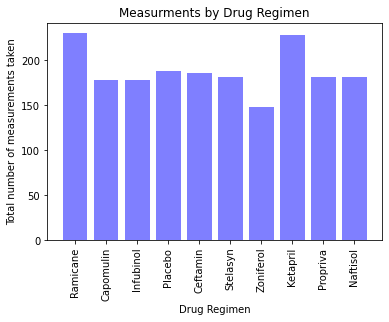

In [38]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

list_drug_regimen = clean_df["Drug Regimen"].unique()
x_axis = np.arange(len(list_drug_regimen))

# Create the ticks for our bar chart's x axis

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list_drug_regimen,rotation=90)

grouped_drug_df = clean_df.groupby(["Drug Regimen"])
group_row_count = grouped_drug_df["Mouse ID"].count()

plt.bar(x_axis,group_row_count, color='b', alpha=0.5, align='center')

# Give the chart a title, x label, and y label
plt.title("Measurments by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of measurements taken")




In [37]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
